有关线性回归的数学理论介绍，可以参考原书网站 ： https://hml.boyuai.com/books/chapter4


最开始需要import必须的Modules。如果遇到提示Could not found XXXXX，那就是没有装这个Module，一般pip install XXXXX就可以解决。

**numpy** 是python的数学库，提供了高效的数学相关计算处理功能。是Python数据分析，机器学习的必备库。

**pandas** 是最常用的数据处理模块，可以对表格化的数据进行快速操作（可以简单理解为可以程序处理的一个强大的Excel表格）

**matplotlib** 是数据可视化（就是画各种漂亮的图表），比如下面这种
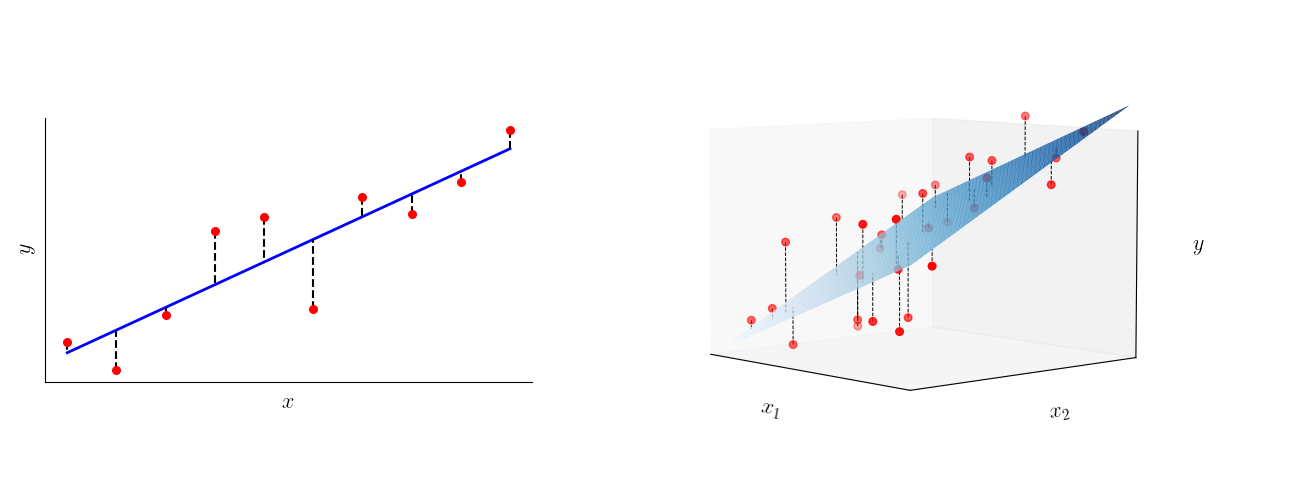

**sklearn** 是一个机器学习库。

常用的机器学习算法库有很多，以下是一些常见的：

**sklearn：** scikit-learn 是一个基于 Python 的开源机器学习库，提供了包括分类、回归、聚类、降维等常见机器学习算法的实现。它具有简单易用的接口和丰富的文档，是入门机器学习的良好选择。

**TensorFlow：**  TensorFlow 是一个用于创建和训练机器学习模型的强大开源库。它支持各种算法，包括深度学习模型的建立和训练。TensorFlow 使用图计算模型，可以在多个设备和平台上运

**Keras：** Keras 是一个基于 Python 的高级神经网络 API，可以在 TensorFlow、Theano 等后端库上运行。Keras 提供了简单易用的接口和丰富的神经网络层和激活函数选项，能够快速构建和训练神经网。

**PyTorch：** PyTorch 是另一个流行的开源深度学习框架，它提供了动态计算图的功能，使得模型的构建和调试更为灵活和直观。PyTorch 支持动态图和静态图的混合使用，具有广泛的模型库和模型

**XGBoost：** XGBoost 是一个优化梯度提升框架，用于解决回归和分类问题。它通过多个弱学习者的组合来提高模型的预测性能。XGBoost 支持并行化训练和预测，具有较高和效。

**LightGBM：**  LightGBM 是一个基于梯度提升决策树的高效机器学习库，具有快速训练和预测速度。它通过基于直方图的算法和并行化训练来加速模tGBM 在处理大规型的构建过程。LightGBM在处理大规模数据集时表现出色。

#### NOAI第二轮要求了掌握sklearn和Pytorch的基本应用，并能在文档的帮助下使用它们解决真实人工相关研究问题。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 导入拆分数据集用的工具包
from sklearn.model_selection import train_test_split
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 导入计算参数的工具包
from sklearn import metrics

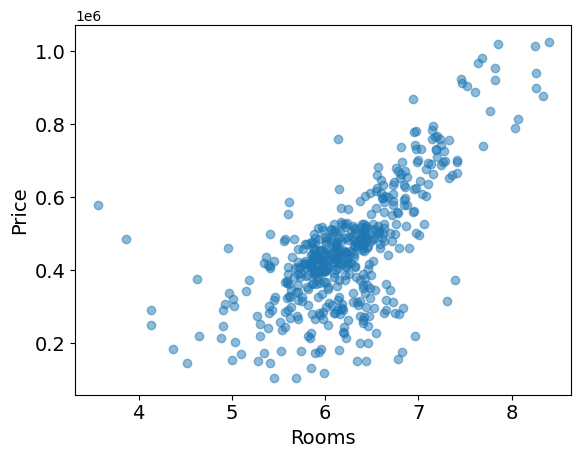

In [4]:
def get_data():
    """读取并处理数据"""
    # 从CSV文件中读取数据
    data = pd.read_csv("housing.csv")
    # 房价数据存入pirce列表
    price = data['MEDV']
    # 去掉房价，留下的房间数存入rooms列表
    rooms = data.drop('MEDV', axis = 1)
    # 返回数据列表
    return rooms, price

def show_data(rooms, price):
    """显示房间数和房价的关系"""
    # 设置坐标标签和文字大小
    plt.xlabel("Rooms", fontsize = 14)
    plt.ylabel("Price", fontsize = 14)
    # 设置刻度标记的大小
    plt.tick_params(axis = "both", which ="major", labelsize = 14)
    # 设置散点的数据源、颜色和大小
    plt.scatter(rooms, price, alpha=0.5)
    # 绘制图表
    plt.show()

def input_data(x_in):
    """将接收的数据处理成DataFrame类型"""
    x_list = []
    x_list.append(x_in)
    x_dic = {'RM':x_list}
    x = pd.DataFrame(x_dic)
    return x

# 读取数据
rooms, price = get_data()
# 显示房间数和房价的关系
show_data(rooms, price)

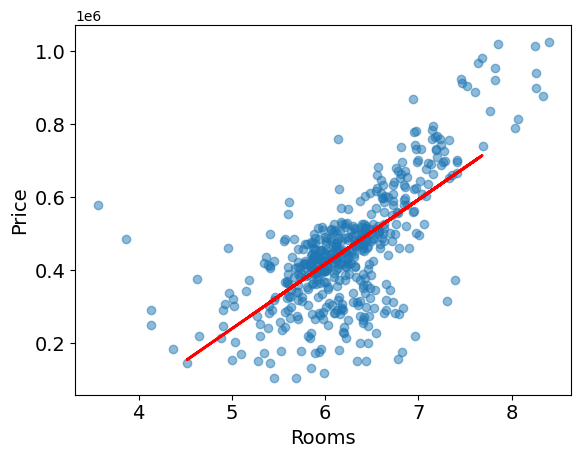

预测平均误差： 82589.92731296993


In [10]:
# 把数据拆分为训练集(80%)和测试集(20%)
X_train, X_test, y_train, y_test = train_test_split(rooms, price, test_size=0.2, random_state=42)

# 构建模型
regr = LinearRegression()

# 用训练集训练
regr.fit(X_train,y_train)

# 对测试集预测
y_predict = regr.predict(X_test)

# 设置坐标标签和文字大小
plt.xlabel("Rooms", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
# 设置刻度标记的大小
plt.tick_params(axis = "both", which ="major", labelsize = 14)
# 设置散点的数据源、颜色和大小
plt.scatter(rooms, price, alpha=0.5)

# 绘制回归线
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression line')

# 绘制图表
plt.show()

score_MAE = metrics.mean_absolute_error(y_predict,y_test)

print("预测平均误差：", score_MAE)

In [6]:
# 接收用户输入的房间数
x = input_data(input("住宅房间数："))
# 用模型预测结果
y = regr.predict(x)
# 输出预测的结果
print("房价预计为", y[0])

住宅房间数：14
房价预计为 1828483.5089146574


这里用了一个最简单的例子，只考虑的房子房间数量和价格的关系而忽略了其他影响参数。测试也是输入房间数来预测房间。  
在我们的下一个例子里面，将会涉及多个参数影响价格的情况。使用线性回归来预测房价。也会将数据分为训练集和测试集来验证模型的准确率。